DateTime Index

In [5]:
from datetime import datetime

In [6]:
my_year = 2020
my_month = 1
my_day = 2
my_hour = 13 
my_min = 30
my_sec = 15

my_date = datetime(my_year,my_month,my_day)
print(my_date)

2020-01-02 00:00:00


In [7]:
my_datetime = datetime(my_year,my_month,my_day,
    my_hour,my_min,my_sec)
my_datetime

datetime.datetime(2020, 1, 2, 13, 30, 15)

In [8]:
my_datetime.day

2

In [9]:

my_datetime.hour

13

In [10]:
import numpy as np

In [11]:
np.array(['2020-03-15','2020-03-16','2020-03-17'],dtype='datetime64')

array(['2020-03-15', '2020-03-16', '2020-03-17'], dtype='datetime64[D]')

In [12]:
np.array(['2020-03-15','2020-03-16','2020-03-17'],dtype='datetime64[Y]')

array(['2020', '2020', '2020'], dtype='datetime64[Y]')

In [13]:
np.array(['2020-03-15','2020-03-16','2020-03-17'],dtype='datetime64[h]')

array(['2020-03-15T00', '2020-03-16T00', '2020-03-17T00'],
      dtype='datetime64[h]')

In [14]:
# Numpy date ranges
np.arange('2018-06-01','2018-06-23',7,dtype='datetime64[D]')

array(['2018-06-01', '2018-06-08', '2018-06-15', '2018-06-22'],
      dtype='datetime64[D]')

In [15]:
np.arange('1968','1976',dtype='datetime64[Y]')

array(['1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975'],
      dtype='datetime64[Y]')

In [16]:
import pandas as pd

In [17]:
pd.date_range('2020-01-01',periods=7,freq='D')

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07'],
              dtype='datetime64[ns]', freq='D')

In [18]:
pd.date_range('2020, Jan 01,01',periods=7,freq='D')

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07'],
              dtype='datetime64[ns]', freq='D')

In [19]:
pd.date_range('Jan 01, 2018',periods=7,freq='D')

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07'],
              dtype='datetime64[ns]', freq='D')

In [20]:
pd.to_datetime(['1/2/2018','Jan 01, 2018'])

DatetimeIndex(['2018-01-02', '2018-01-01'], dtype='datetime64[ns]', freq=None)

In [21]:
pd.to_datetime(['1/3/2018','3/1/2018'],format='%d/%m/%Y')

DatetimeIndex(['2018-03-01', '2018-01-03'], dtype='datetime64[ns]', freq=None)

In [22]:
pd.to_datetime(['1--3--2018','3--1--2018'],format='%d--%m--%Y')

DatetimeIndex(['2018-03-01', '2018-01-03'], dtype='datetime64[ns]', freq=None)

In [23]:
data = np.random.randn(3,2)
cols = ['A','B']
print(data)

[[-2.30437208 -1.24161981]
 [-0.61529624  2.04772573]
 [-0.58016556 -0.9233031 ]]


In [24]:
idx = pd.date_range('2020-01-01',periods=3,freq='D')
df = pd.DataFrame(data=data, index=idx, columns=cols)
df

,A,B
2020-01-01,-2.304372,-1.241620
2020-01-02,-0.615296,2.047726
2020-01-03,-0.580166,-0.923303


In [25]:
df.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03'], dtype='datetime64[ns]', freq='D')

In [26]:
df.index.max()

Timestamp('2020-01-03 00:00:00', freq='D')

In [27]:
df.index.argmax()

2

In [28]:
df.index.min()

Timestamp('2020-01-01 00:00:00', freq='D')

In [29]:
df.index.argmin()

0

Time Resampling

When calling `.resample()` you first need to pass in a **rule** parameter, then you need to call some sort of aggregation function.

The **rule** parameter describes the frequency with which to apply the aggregation function (daily, monthly, yearly, etc.)<br>
It is passed in using an "offset alias" - refer to the table below. [[reference](http://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases)]

The aggregation function is needed because, due to resampling, we need some sort of mathematical rule to join the rows (mean, sum, count, etc.)

<table style="display: inline-block">
    <caption style="text-align: center"><strong>TIME SERIES OFFSET ALIASES</strong></caption>
<tr><th>ALIAS</th><th>DESCRIPTION</th></tr>
<tr><td>B</td><td>business day frequency</td></tr>
<tr><td>C</td><td>custom business day frequency (experimental)</td></tr>
<tr><td>D</td><td>calendar day frequency</td></tr>
<tr><td>W</td><td>weekly frequency</td></tr>
<tr><td>M</td><td>month end frequency</td></tr>
<tr><td>SM</td><td>semi-month end frequency (15th and end of month)</td></tr>
<tr><td>BM</td><td>business month end frequency</td></tr>
<tr><td>CBM</td><td>custom business month end frequency</td></tr>
<tr><td>MS</td><td>month start frequency</td></tr>
<tr><td>SMS</td><td>semi-month start frequency (1st and 15th)</td></tr>
<tr><td>BMS</td><td>business month start frequency</td></tr>
<tr><td>CBMS</td><td>custom business month start frequency</td></tr>
<tr><td>Q</td><td>quarter end frequency</td></tr>
<tr><td></td><td><font color=white>intentionally left blank</font></td></tr></table>

<table style="display: inline-block; margin-left: 40px">
<caption style="text-align: center"></caption>
<tr><th>ALIAS</th><th>DESCRIPTION</th></tr>
<tr><td>BQ</td><td>business quarter endfrequency</td></tr>
<tr><td>QS</td><td>quarter start frequency</td></tr>
<tr><td>BQS</td><td>business quarter start frequency</td></tr>
<tr><td>A</td><td>year end frequency</td></tr>
<tr><td>BA</td><td>business year end frequency</td></tr>
<tr><td>AS</td><td>year start frequency</td></tr>
<tr><td>BAS</td><td>business year start frequency</td></tr>
<tr><td>BH</td><td>business hour frequency</td></tr>
<tr><td>H</td><td>hourly frequency</td></tr>
<tr><td>T, min</td><td>minutely frequency</td></tr>
<tr><td>S</td><td>secondly frequency</td></tr>
<tr><td>L, ms</td><td>milliseconds</td></tr>
<tr><td>U, us</td><td>microseconds</td></tr>
<tr><td>N</td><td>nanoseconds</td></tr></table>

In [30]:
pwd

'c:\\Users\\manor\\OneDrive - kettering.edu\\Online Learning Portal Docs\\Udemy\\Personal\\Python for Time Series Data Analysis'

In [31]:
df = pd.read_csv('Data/starbucks.csv',
                 index_col='Date',
                 parse_dates=True)
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1006 entries, 2015-01-02 to 2018-12-31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1006 non-null   float64
 1   Volume  1006 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 23.6 KB


In [33]:
df.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

In [34]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [35]:
# daily ..> yearly
print(df.resample(rule='A').mean())
print(df.resample(rule='A').min())
print(df.resample(rule='A').max())
print(df.resample(rule='A').std())
print(df.resample(rule='A').sum())

                Close        Volume
Date                               
2015-12-31  50.078100  8.649190e+06
2016-12-31  53.891732  9.300633e+06
2017-12-31  55.457310  9.296078e+06
2018-12-31  56.870005  1.122883e+07
              Close   Volume
Date                        
2015-12-31  36.9748  2215418
2016-12-31  49.4458  3228848
2017-12-31  51.2345  3479177
2018-12-31  47.9470  4843941
              Close    Volume
Date                         
2015-12-31  59.8475  38107194
2016-12-31  58.0465  32820193
2017-12-31  62.4924  53454789
2018-12-31  68.3530  62091071
               Close        Volume
Date                              
2015-12-31  6.076922  4.093368e+06
2016-12-31  1.958114  3.936798e+06
2017-12-31  2.415526  4.690972e+06
2018-12-31  4.678178  6.465358e+06
                 Close      Volume
Date                              
2015-12-31  12619.6811  2179595896
2016-12-31  13580.7164  2343759515
2017-12-31  13919.7849  2333315537
2018-12-31  14274.3712  2818435669


In [36]:
def first_day(entry):
    '''"Python for Time Series Data Analysis_Notes and code.ipynb"
    Returns first instance of the period regardless of sampling 
    Input -> entry: timestamp
    '''
    #Is there an entry?
    # if len(entry) != 0:
    if len(entry):
        #If so, return first entry
        return entry[0]

In [37]:
print(df.resample(rule='A').apply(first_day))

              Close    Volume
Date                         
2015-12-31  38.0061   6906098
2016-12-31  55.0780  13521544
2017-12-31  53.1100   7809307
2018-12-31  56.3243   7215978


In [38]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

<Axes: title={'center': 'Yearly Mean Closing Price for Startbucks'}, xlabel='Date'>

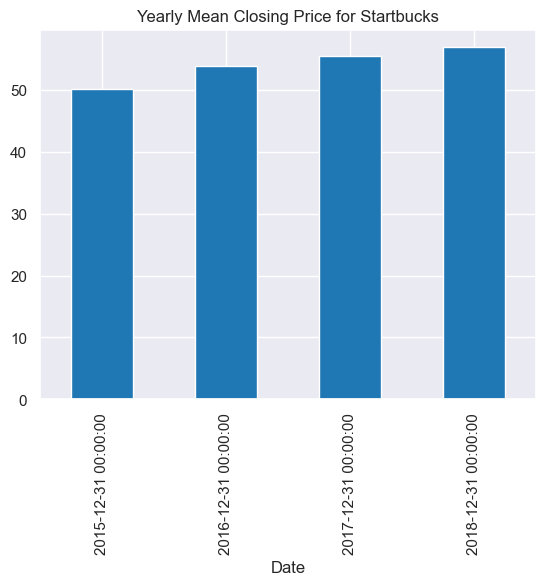

In [41]:
title = 'Yearly Mean Closing Price for Startbucks'
df['Close'].resample('A').mean().plot.bar(title=title, color=['#1f77b4'])

<Axes: title={'center': 'Monthly Mean Closing Price for Startbucks'}, xlabel='Date'>

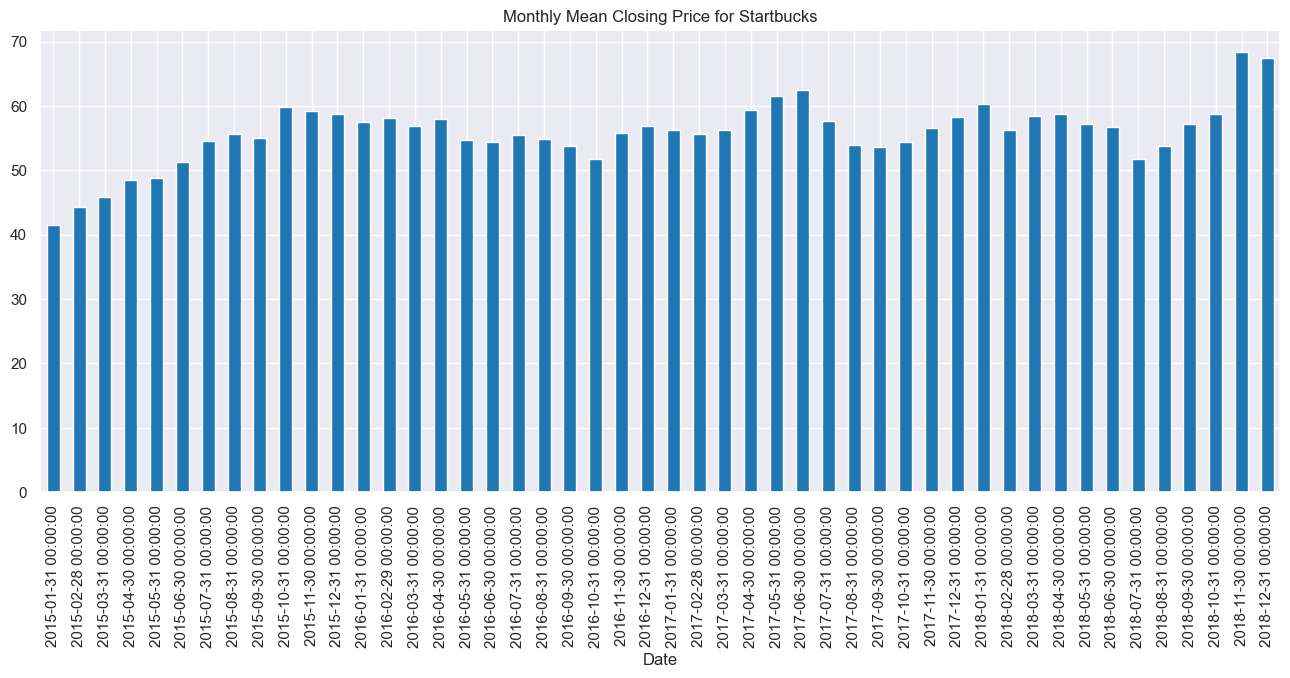

In [42]:
title = 'Monthly Mean Closing Price for Startbucks'
df['Close'].resample('M').max().plot.bar(figsize = (16,6), title=title, color=['#1f77b4'])

Time Shifting

In [44]:
df = pd.read_csv('Data/starbucks.csv',index_col='Date',parse_dates=True)
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [45]:
df.tail()

,Close,Volume
Date,,
2018-12-24,60.56,6323252
2018-12-26,63.08,16646238
2018-12-27,63.20,11308081
2018-12-28,63.39,7712127
2018-12-31,64.40,7690183


In [46]:
df.shift(1)

,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,38.0061,6906098.0
2015-01-06,37.2781,11623796.0
2015-01-07,36.9748,7664340.0
2015-01-08,37.8848,9732554.0
...,...,...
2018-12-24,61.3900,23524888.0
2018-12-26,60.5600,6323252.0
2018-12-27,63.0800,16646238.0


In [47]:
df.shift(1).tail()

,Close,Volume
Date,,
2018-12-24,61.39,23524888.0
2018-12-26,60.56,6323252.0
2018-12-27,63.08,16646238.0
2018-12-28,63.20,11308081.0
2018-12-31,63.39,7712127.0


In [49]:
print(df.shift(5))
print(df.shift(5).tail())

            Close      Volume
Date                         
2015-01-02    NaN         NaN
2015-01-05    NaN         NaN
2015-01-06    NaN         NaN
2015-01-07    NaN         NaN
2015-01-08    NaN         NaN
...           ...         ...
2018-12-24  64.47  15143054.0
2018-12-26  64.92  10523476.0
2018-12-27  64.06  14390146.0
2018-12-28  62.15  20264918.0
2018-12-31  61.39  23524888.0

[1006 rows x 2 columns]
            Close      Volume
Date                         
2018-12-24  64.47  15143054.0
2018-12-26  64.92  10523476.0
2018-12-27  64.06  14390146.0
2018-12-28  62.15  20264918.0
2018-12-31  61.39  23524888.0


In [50]:
df.shift(-1)

,Close,Volume
Date,,
2015-01-02,37.2781,11623796.0
2015-01-05,36.9748,7664340.0
2015-01-06,37.8848,9732554.0
2015-01-07,38.4961,13170548.0
2015-01-08,37.2361,27556706.0
...,...,...
2018-12-24,63.0800,16646238.0
2018-12-26,63.2000,11308081.0
2018-12-27,63.3900,7712127.0


In [51]:
df.shift(-1).tail()

,Close,Volume
Date,,
2018-12-24,63.08,16646238.0
2018-12-26,63.20,11308081.0
2018-12-27,63.39,7712127.0
2018-12-28,64.40,7690183.0
2018-12-31,NaN,NaN


In [52]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [53]:
df.shift(periods=1, freq='M').head()

,Close,Volume
Date,,
2015-01-31,38.0061,6906098
2015-01-31,37.2781,11623796
2015-01-31,36.9748,7664340
2015-01-31,37.8848,9732554
2015-01-31,38.4961,13170548


In [54]:
df.shift(periods=-1, freq='M').head()

,Close,Volume
Date,,
2014-12-31,38.0061,6906098
2014-12-31,37.2781,11623796
2014-12-31,36.9748,7664340
2014-12-31,37.8848,9732554
2014-12-31,38.4961,13170548


In [ ]:
df.shift(periods=1, freq='M').head()

In [55]:
df.shift(1,fill_value='Not NaN')

,Close,Volume
Date,,
2015-01-02,Not NaN,Not NaN
2015-01-05,38.0061,6906098
2015-01-06,37.2781,11623796
2015-01-07,36.9748,7664340
2015-01-08,37.8848,9732554
...,...,...
2018-12-24,61.39,23524888
2018-12-26,60.56,6323252
2018-12-27,63.08,16646238


Rolling and Expanding

In [56]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


<Axes: xlabel='Date'>

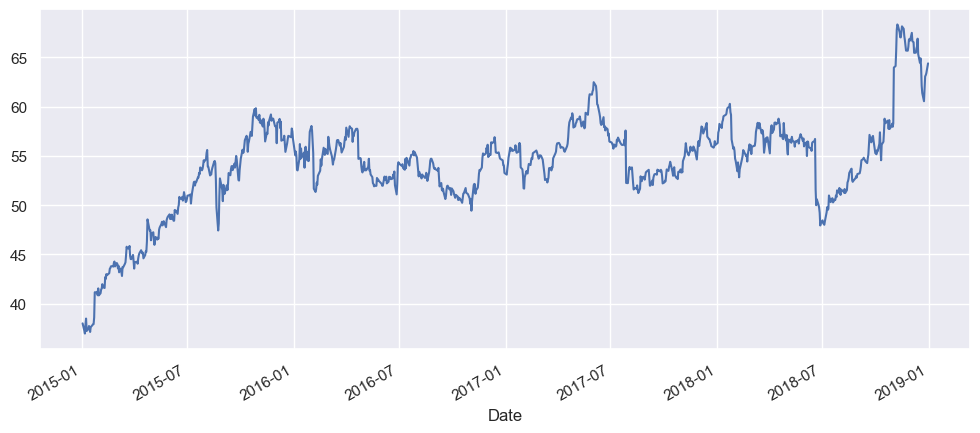

In [58]:
df['Close'].plot(figsize=(12,5))

<Axes: xlabel='Date'>

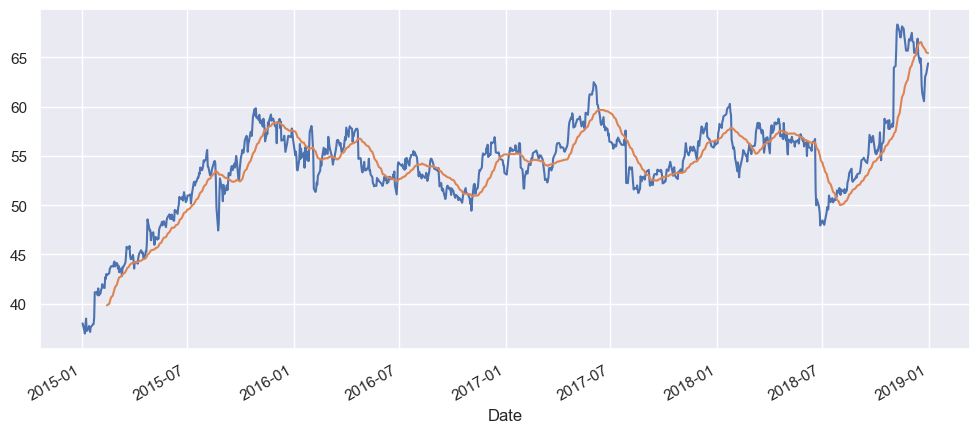

In [61]:
df['Close'].plot(figsize=(12,5))
df.rolling(window=30).mean()['Close'].plot()

<Axes: xlabel='Date'>

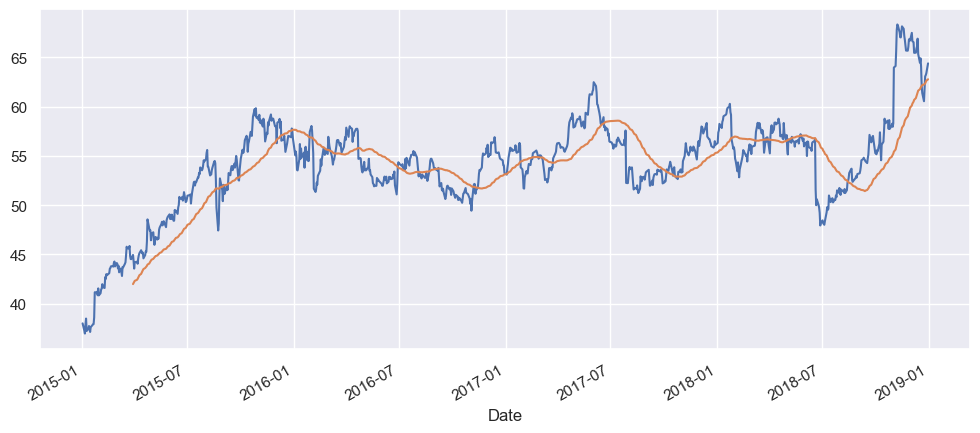

In [62]:
df['Close'].plot(figsize=(12,5))
df.rolling(window=60).mean()['Close'].plot()

<Axes: xlabel='Date'>

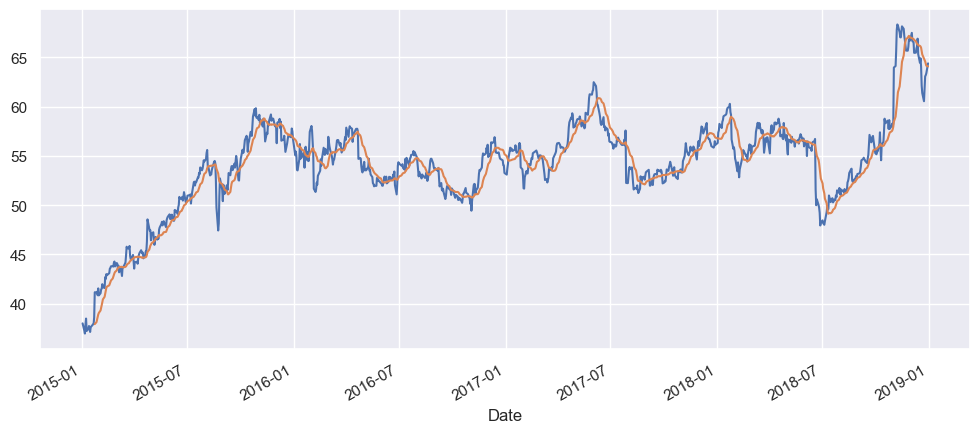

In [63]:
df['Close'].plot(figsize=(12,5))
df.rolling(window=15).mean()['Close'].plot()

In [64]:
df['Close: 30 Day Mean'] = df['Close'].rolling(window=30).mean()

In [65]:
df.head()

,Close,Volume,Close: 30 Day Mean
Date,,,
2015-01-02,38.0061,6906098,NaN
2015-01-05,37.2781,11623796,NaN
2015-01-06,36.9748,7664340,NaN
2015-01-07,37.8848,9732554,NaN
2015-01-08,38.4961,13170548,NaN


<Axes: xlabel='Date'>

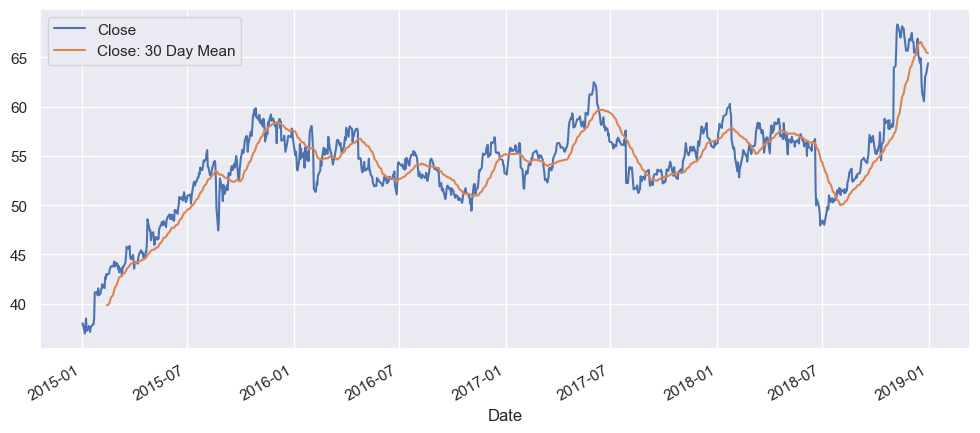

In [66]:
df[['Close','Close: 30 Day Mean']].plot(figsize=(12,5))

In [67]:
df['Close: 60 Day Mean'] = df['Close'].rolling(window=60).mean()

<Axes: xlabel='Date'>

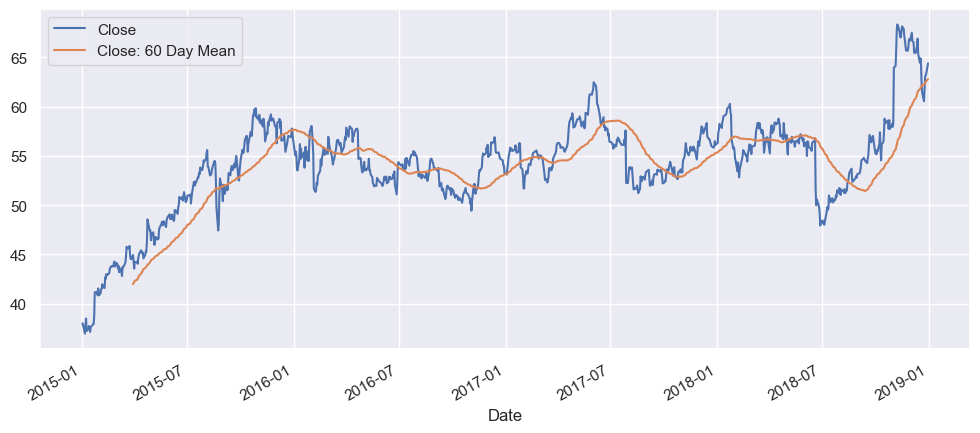

In [68]:
df[['Close','Close: 60 Day Mean']].plot(figsize=(12,5))

<Axes: xlabel='Date'>

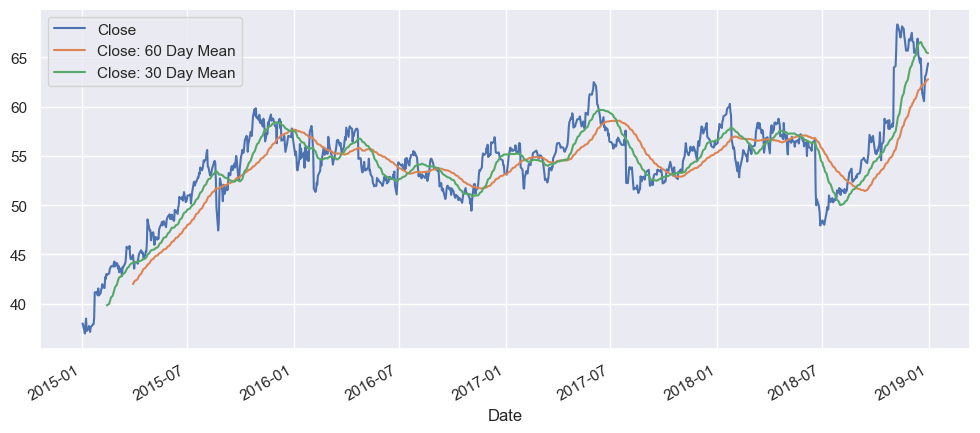

In [69]:
df[['Close','Close: 60 Day Mean','Close: 30 Day Mean']].plot(figsize=(12,5))

<Axes: xlabel='Date'>

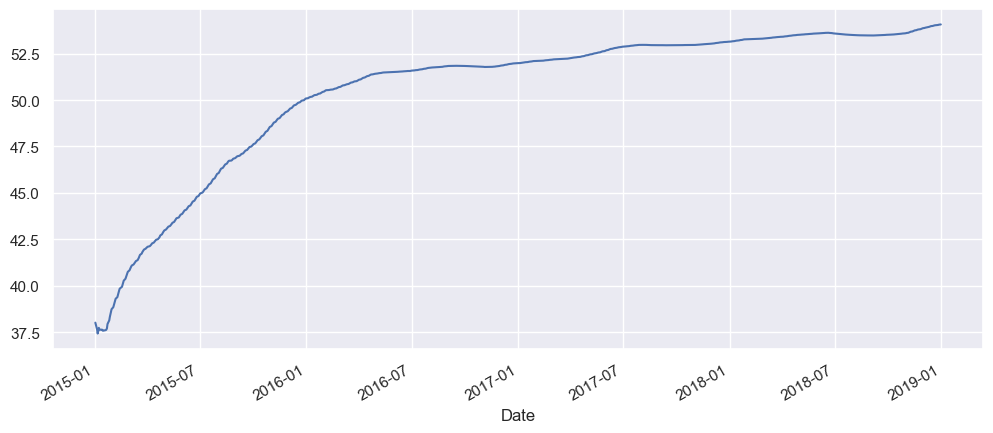

In [70]:
df['Close'].expanding().mean().plot(figsize=(12,5))

Visualizing Time Series Data with Pandas

In [72]:
df = pd.read_csv('Data/starbucks.csv',index_col='Date',parse_dates=True)
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [73]:
df.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

In [74]:
# VIMPT #### To convert index into datetime 
# df.index = pd.to_datetime(df.index)

In [76]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


<Axes: xlabel='Date'>

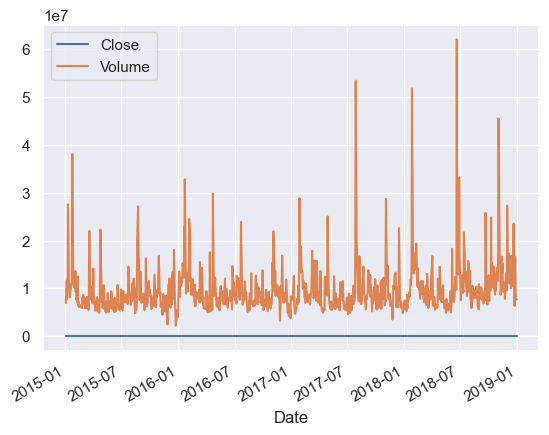

In [75]:
df.plot()

<Axes: xlabel='Date'>

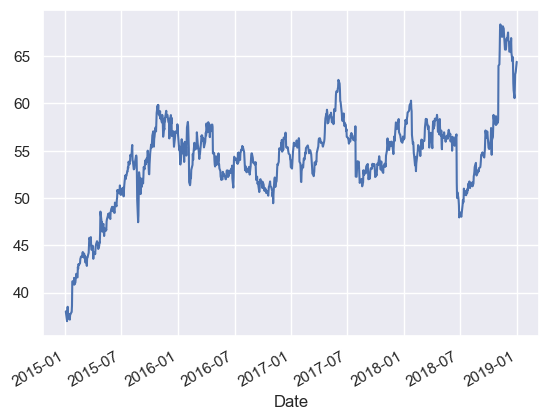

In [77]:
df['Close'].plot()

<Axes: xlabel='Date'>

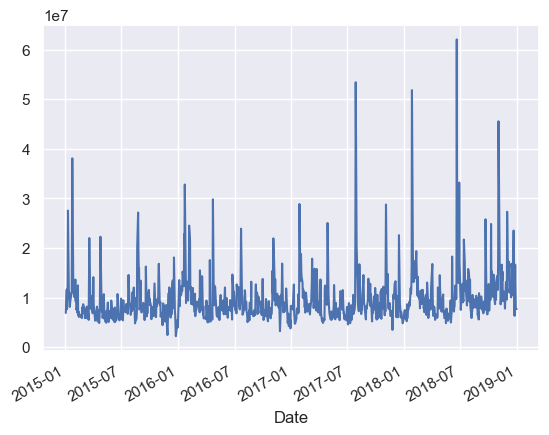

In [78]:
df['Volume'].plot()

In [79]:
title = 'Title'
ylabel = 'Y Label'
xlabel = 'X Label'

[Text(0.5, 0, 'X Label'), Text(0, 0.5, 'Y Label')]

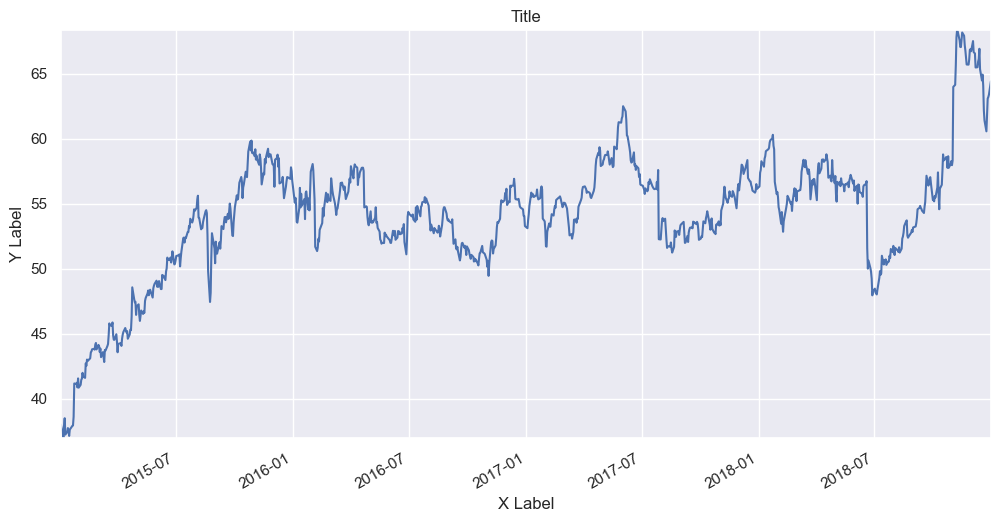

In [83]:
ax = df['Close'].plot(figsize=(12,6), title=title)
# Auto Scale axis
ax.autoscale(axis='both',tight=True)    # y for y-axis, x for scaling x-axis
ax.set(xlabel=xlabel,ylabel=ylabel)

There are actually two ways we can set a specific span of time as an x axis limit.
We can either edit it on the data frame side or edit it on the plotting side.

<Axes: xlabel='Date'>

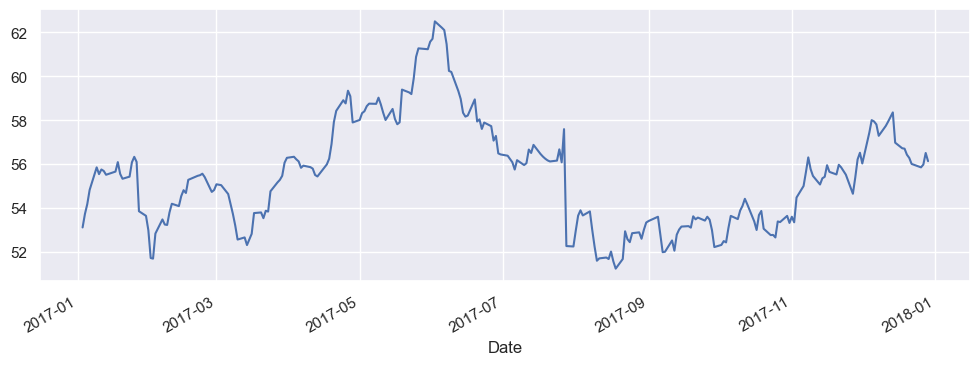

In [85]:
# Method 1 - Adding xlimit at Column Level
df['Close']['2017-01-01':'2017-12-31'].plot(figsize=(12,4))

<Axes: xlabel='Date'>

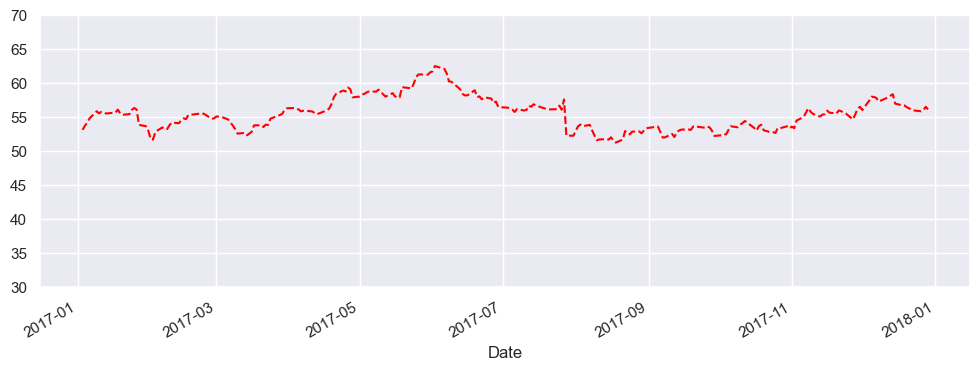

In [94]:
df['Close']['2017-01-01':'2017-12-31'].plot(figsize=(12,4),ylim=[30,70],ls='--', c='red')

<Axes: xlabel='Date'>

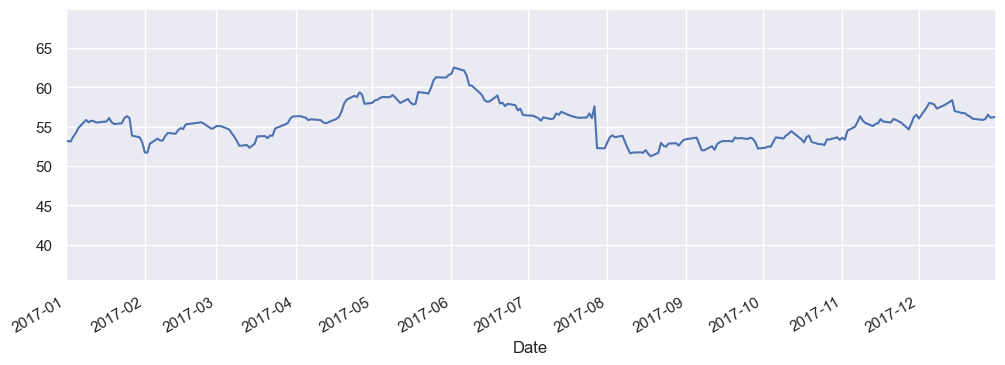

In [89]:
# Method 2 - Adding xlimit at Plot Level... 
# Scale of y results is the same just the scale of value of y is different in both methods
df['Close'].plot(figsize=(12,4),xlim=['2017-01-01','2017-12-31'])


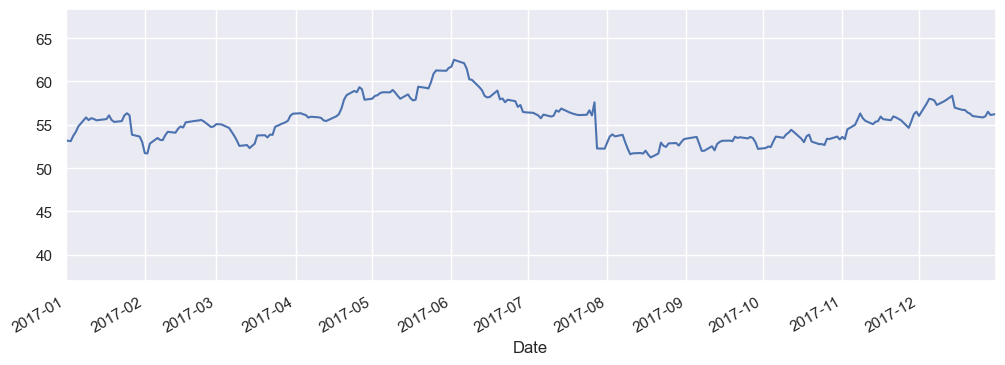

In [90]:
ax = df['Close'].plot(figsize=(12,4),xlim=['2017-01-01','2017-12-31'])
ax.autoscale(axis='y',tight=True) 

In [95]:
# Setting date ticks
from matplotlib import dates

### Date Formatting
Formatting follows the Python datetime <strong><a href='http://strftime.org/'>strftime</a></strong> codes.<br>
The following examples are based on <tt>datetime.datetime(2001, 2, 3, 16, 5, 6)</tt>:
<br><br>

<table style="display: inline-block">  
<tr><th>CODE</th><th>MEANING</th><th>EXAMPLE</th><tr>
<tr><td>%Y</td><td>Year with century as a decimal number.</td><td>2001</td></tr>
<tr><td>%y</td><td>Year without century as a zero-padded decimal number.</td><td>01</td></tr>
<tr><td>%m</td><td>Month as a zero-padded decimal number.</td><td>02</td></tr>
<tr><td>%B</td><td>Month as locale’s full name.</td><td>February</td></tr>
<tr><td>%b</td><td>Month as locale’s abbreviated name.</td><td>Feb</td></tr>
<tr><td>%d</td><td>Day of the month as a zero-padded decimal number.</td><td>03</td></tr>  
<tr><td>%A</td><td>Weekday as locale’s full name.</td><td>Saturday</td></tr>
<tr><td>%a</td><td>Weekday as locale’s abbreviated name.</td><td>Sat</td></tr>
<tr><td>%H</td><td>Hour (24-hour clock) as a zero-padded decimal number.</td><td>16</td></tr>
<tr><td>%I</td><td>Hour (12-hour clock) as a zero-padded decimal number.</td><td>04</td></tr>
<tr><td>%p</td><td>Locale’s equivalent of either AM or PM.</td><td>PM</td></tr>
<tr><td>%M</td><td>Minute as a zero-padded decimal number.</td><td>05</td></tr>
<tr><td>%S</td><td>Second as a zero-padded decimal number.</td><td>06</td></tr>
</table>
<table style="display: inline-block">
<tr><th>CODE</th><th>MEANING</th><th>EXAMPLE</th><tr>
<tr><td>%#m</td><td>Month as a decimal number. (Windows)</td><td>2</td></tr>
<tr><td>%-m</td><td>Month as a decimal number. (Mac/Linux)</td><td>2</td></tr>
<tr><td>%#x</td><td>Long date</td><td>Saturday, February 03, 2001</td></tr>
<tr><td>%#c</td><td>Long date and time</td><td>Saturday, February 03, 2001 16:05:06</td></tr>
</table>  
    

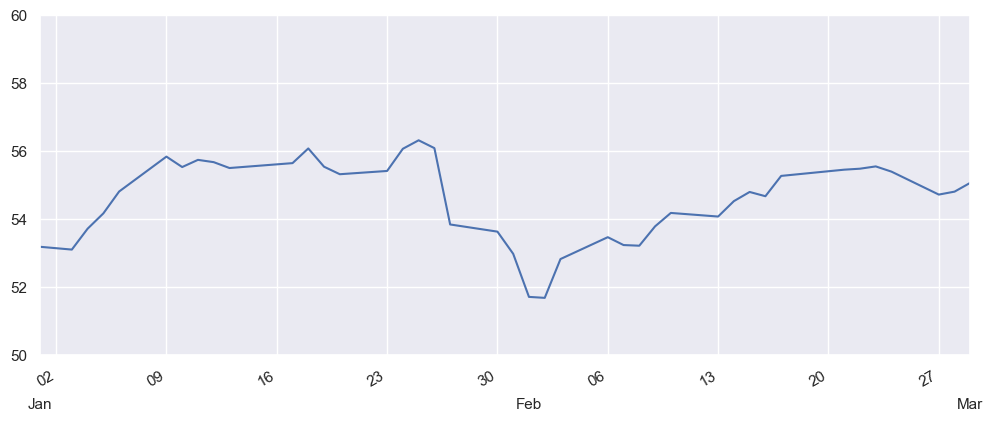

In [105]:
ax = df['Close'].plot(xlim=['2017-01-01','2017-03-01'],ylim=[50,60],figsize=(12,5))
ax.set(xlabel='')


ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))
# ax.xaxis.set_major_formatter(dates.DateFormatter('%a-%B-%d'))   
ax.xaxis.set_major_formatter(dates.DateFormatter('%d'))   

ax.xaxis.set_minor_locator(dates.MonthLocator())
ax.xaxis.set_minor_formatter(dates.DateFormatter('\n\n%b'))

#adding grid lines
ax.yaxis.grid(True)
ax.xaxis.grid(True)